In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

I use generic variable names numbered with the exercise number.

## Exercise 1

In [2]:
# Creating a 1-D vector

data_arr = np.array([x for x in range(0, 12)])
data_arr

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [18]:
# Reshaping the array

data_1 = data_arr.reshape(4, 3)
data_1

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [20]:
df_1 = pd.DataFrame(data_1, columns=['A', 'B', 'C'])
df_1

,A,B,C
0,0,1,2
1,3,4,5
2,6,7,8
3,9,10,11


/tmp/ipykernel_141981/3212997599.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_1.index)


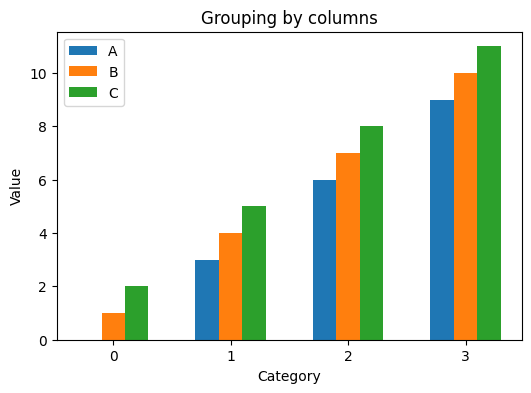

In [21]:
# First plot (Fig 3.26 (B))

fig, ax = plt.subplots(figsize=(6, 4))

# Setting bar width
width = 0.20
multiplier = 0

# Plotting all the columns
for col in df_1.columns:
    offset = width * multiplier
    ax.bar(df_1.index + offset, df_1[col], width, label=col)
    multiplier += 1

# Setting labels and titles
ax.set_xlabel('Category')
ax.set_ylabel('Value')
ax.set_title('Grouping by columns')

# Customizing x-ticks
ax.set_xticklabels(df_1.index)
ax.set_xticks(df_1.index+width)

# Legend
ax.legend()

plt.show();

In [24]:
# Transposing the DataFrame

new_df_1 = df_1.T
new_df_1

,0,1,2,3
A,0,3,6,9
B,1,4,7,10
C,2,5,8,11


/tmp/ipykernel_141981/2395404925.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_df_1.index)


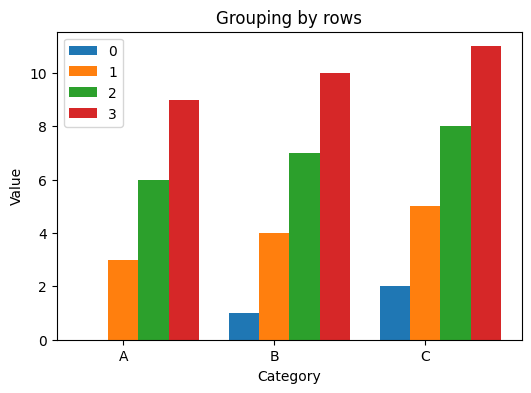

In [25]:
# Second plot (Fig 3.26 (C))

fig, ax = plt.subplots(figsize=(6, 4))

# Setting bar width
width = 0.20
multiplier = 0

# Need to convert new_df index in numerical form to shift each column by the offset.
x = np.arange(len(new_df_1.index))

# Plotting all the columns
for col in new_df_1.columns:
    offset = width * multiplier
    ax.bar(x+offset, new_df_1[col], width, label=col)
    multiplier += 1

# Setting labels and titles
ax.set_xlabel('Category')
ax.set_ylabel('Value')
ax.set_title('Grouping by rows')

# Customizing x-ticks
ax.set_xticklabels(new_df_1.index)
ax.set_xticks(x+width)

# Legend
ax.legend()

Exercise Completed.

## Exercise 2

In [8]:
# List of Columns

cols = [x for x in range(1,7)]
cols

[1, 2, 3, 4, 5, 6]

In [9]:
# Corresponding means

means = [(x + 1) **2 for x in cols]
means

[4, 9, 16, 25, 36, 49]

In [10]:
# Corresponding standard deviations

stds = [30*((2*x / 5) - 1)**2 for x in cols]
stds

[10.799999999999999,
 1.1999999999999993,
 1.1999999999999993,
 10.800000000000002,
 30.0,
 58.79999999999999]

In [26]:
# Empty DataFrame

df_2 = pd.DataFrame()
df_2

""


In [27]:
# Adding values to the Dataframe

for i in range(0,6):
    df_2[cols[i]] = np.random.normal(means[i], stds[i], 30)

In [28]:
# Checking dataframe

df_2.head()

,1,2,3,4,5,6
0,6.875177,7.314739,15.522365,22.180252,39.693817,-75.678671
1,22.201322,7.321944,16.455954,26.274521,64.863662,11.828028
2,-5.299072,9.474195,16.242938,33.879920,18.634975,92.258199
3,-11.074741,8.587552,14.578938,30.741883,24.823533,85.275695
4,20.476966,9.412851,17.272016,21.453429,10.792932,42.406650


Text(0.5, 1.0, 'C) Error bar plot')

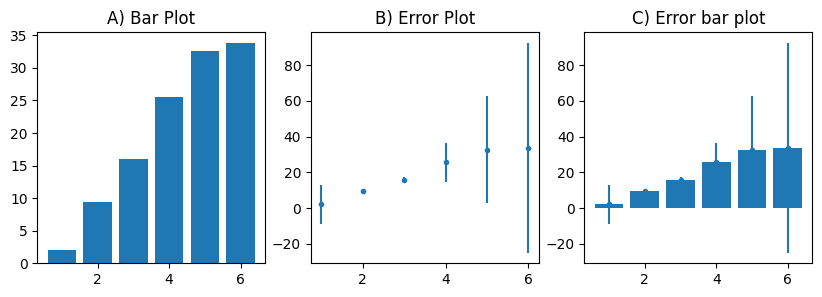

In [29]:
# Plotting

# Creating 3 figures in one row
fig, ax = plt.subplots(1, 3, figsize=(10,3))

# A plot
ax[0].bar(x=cols, height=[df_2[col].mean() for col in cols])
ax[0].set_title('A) Bar Plot')

# B plot
ax[1].errorbar(x=cols, y=[df_2[col].mean() for col in cols], yerr=stds, marker='.', linestyle='')
ax[1].set_title('B) Error Plot')

# C plot
ax[2].bar(x=cols, height=[df_2[col].mean() for col in cols])
ax[2].errorbar(x=cols, y=[df_2[col].mean() for col in cols], yerr=stds, marker='.', linestyle='')
ax[2].set_title('C) Error bar plot')

Exercise Completed.

## Exercise 3

In [15]:
# Data dict

d = {
    'Chocolate': 24,
     'Vanilla' : 16,
  'Strawberry' :  7,
   'Pistachio' : 16
   }

In [30]:
data_3 = pd.Series(d, index=d.keys())
data_3

Chocolate     24
Vanilla       16
Strawberry     7
Pistachio     16
dtype: int64

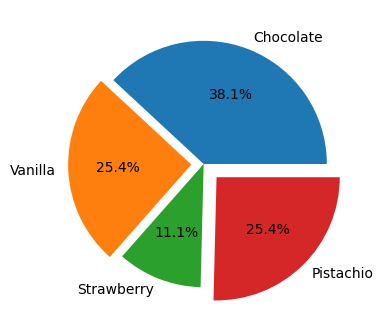

In [31]:
# Plot

fig, ax = plt.subplots(figsize=(4,4))

ax.pie(data_3, labels=data.index, autopct="%1.1f%%", explode=[0, 0.1, 0, 0.15]);

Exercise Completed.

## Exercise 4

In [52]:
# Creating the data

data_4 = np.random.gamma(shape=1, scale=1, size=500)
data_4[:10]

array([1.10404632, 0.993194  , 0.59846448, 0.03176254, 0.65308824,
       1.58586284, 1.86960056, 0.4245895 , 0.15170509, 0.09997202])

In [53]:
# Binning the data

y_4, x_4 = np.histogram(data_4, bins=40)
x_4 = (x_4[:-1] + x_4[1:]) /2

# Normalize the values

yp_4 = y*100 / np.sum(y)

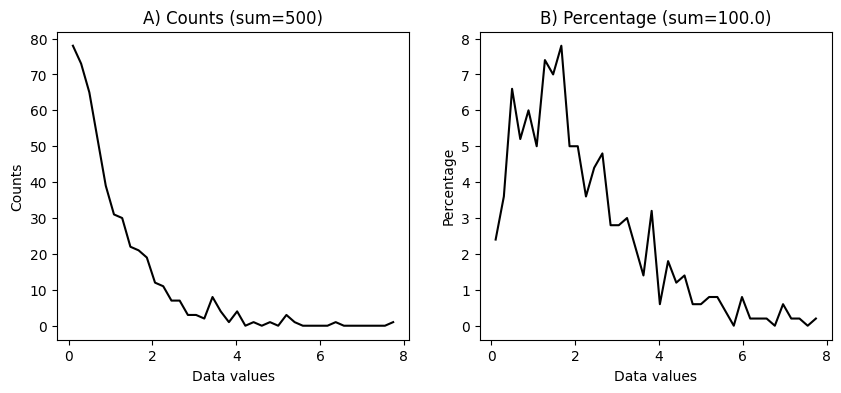

In [56]:
# Plot

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot A
axs[0].plot(x_4, y_4, color='black')
axs[0].set_title(f'A) Counts (sum={np.sum(y_4)})')
axs[0].set_xlabel('Data values')
axs[0].set_ylabel('Counts')

# Plot B
axs[1].plot(x_4, yp_4, color='black')
axs[1].set_title(f'B) Percentage (sum={np.sum(yp_4)})')
axs[1].set_xlabel('Data values')
axs[1].set_ylabel('Percentage')

plt.show();

Exercise Completed

## Exercise 5